# **Machine Learning model for gas production prediction**
# **Part 3: Machine Learning Regression Model Training and Evaluation**
### **Author:** M. Sc. Alberto M. Palacio Bastos - Data Scientist
### **Objective:** Build a model to estimate gas production.
### **Dataset:** http://huy302.github.io/interview_dataset.csv

## 3.1. Import libraries and packages

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualizaton
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

# for data preprocessing
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.feature_selection import RFE

# for model construction
import keras
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from scikeras.wrappers import KerasRegressor

# for model evaluation
import sklearn.metrics as metrics

# for displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying plots in notebook cell
%matplotlib inline

# Loading confirmation
print("Libraries Loaded:\n",
      " Numpy:", np.__version__, "\n",
      " Pandas:", pd.__version__, "\n",
      " Matplotlib:", matplotlib.__version__, "\n",
      " Seaborn:", sns.__version__, "\n",
      " Scikit-learn:", sklearn.__version__, "\n",
      " Keras:", keras.__version__)

Libraries Loaded:
  Numpy: 1.26.2 
  Pandas: 2.2.1 
  Matplotlib: 3.8.3 
  Seaborn: 0.13.0 
  Scikit-learn: 1.3.2 
  Keras: 3.2.1


## 3.2. Load features dataset

In [2]:
# Load dataset
df = pd.read_csv("features_dataset.csv")
df.head()

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
0,3,1,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,88,1.67,1144.898997,228.214286,1450.033022
1,4,1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,100,0.77,337.858984,220.000000,1060.764407
2,5,3,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,94,1.32,634.250166,229.571429,607.530385
3,6,4,10,-36.990002,13254,7956.0,2.49,7,3099,30416.95,0.07,4.74,0.85,12928.82,97,0.85,476.988834,225.857143,1251.606147
4,7,4,8,-36.669998,15212,7878.0,2.89,6,6153,34904.61,0.35,4.78,0.73,12789.52,89,1.09,1045.082698,232.857143,2719.967368


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   treatment_company     534 non-null    int64  
 1   operator              534 non-null    int64  
 2   age                   534 non-null    int64  
 3   azimuth               534 non-null    float64
 4   md                    534 non-null    int64  
 5   tvd                   534 non-null    float64
 6   porpoise_deviation    534 non-null    float64
 7   porpoise_count        534 non-null    int64  
 8   shale_footage         534 non-null    int64  
 9   acoustic_impedance    534 non-null    float64
 10  log_permeability      534 non-null    float64
 11  toc                   534 non-null    float64
 12  vcl                   534 non-null    float64
 13  p-velocity            534 non-null    float64
 14  pump_rate             534 non-null    int64  
 15  proppant_fluid_ratio  5

In [4]:
df.describe(include='all')

,treatment_company,operator,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,production
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,7.204120,10.559925,9.054307,-33.682484,13873.367041,7127.099251,50.107584,10.222846,5602.711610,33483.483165,0.646798,4.630825,0.638146,12783.176105,84.707865,1.156835,689.057863,228.702782,1770.325751
std,5.189243,7.775169,2.227841,17.593313,2406.045868,901.899669,116.314357,7.516396,3208.231758,2108.766975,0.396552,0.557879,0.320216,672.104369,12.740035,0.388070,312.886747,7.696672,1016.527353
min,1.000000,1.000000,5.000000,-83.260002,8765.000000,4935.000000,0.030000,1.000000,65.000000,26740.050000,-0.020000,1.630000,0.070000,11097.430000,2.000000,0.040000,45.182288,210.071429,76.107246
25%,3.000000,4.250000,7.000000,-45.434999,12103.750000,6418.250000,4.572500,5.000000,3558.250000,32831.190000,0.320000,4.510000,0.470000,12256.202500,76.000000,0.950000,463.078031,224.428571,1005.231260
50%,7.000000,8.000000,9.000000,-33.905735,13674.000000,6994.000000,11.675000,8.000000,5085.000000,34564.350000,0.540000,4.680000,0.580000,13114.050000,86.000000,1.120000,645.175182,227.785714,1521.560093
75%,10.000000,14.000000,11.000000,-22.657500,15327.000000,7881.000000,29.672500,15.000000,7153.250000,34807.207500,0.910000,4.810000,0.630000,13263.560000,95.000000,1.317500,880.486042,230.839286,2455.886013
max,31.000000,35.000000,13.000000,19.969999,22584.000000,9067.000000,979.460000,39.000000,17763.000000,38057.630000,1.930000,6.860000,2.000000,13834.170000,110.000000,5.410000,1819.559883,246.928571,4844.717392


## 3.3. Isolate features and target

In [5]:
features_df = df.drop(columns='production')
target_df = df['production']
print("Features shape:", features_df.shape, "\n", "Target shape:", target_df.shape)

Features shape: (534, 18) 
 Target shape: (534,)


## 3.4. Encode categorical variables `treatment_company` and `operator`

In [6]:
encoder = preprocessing.OneHotEncoder(min_frequency=30, sparse_output=False)
one_hot_encoded = encoder.fit_transform(features_df[['treatment_company', 'operator']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['treatment_company', 'operator']))
encoded_features_df = pd.concat([features_df,one_hot_df], axis=1)
encoded_features_df = encoded_features_df.drop(columns=['treatment_company', 'operator'])

encoded_features_df.head()


,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,treatment_company_1,treatment_company_2,treatment_company_4,treatment_company_5,treatment_company_8,treatment_company_9,treatment_company_10,treatment_company_12,treatment_company_infrequent_sklearn,operator_1,operator_4,operator_5,operator_6,operator_7,operator_8,operator_11,operator_14,operator_infrequent_sklearn
0,6,-26.879999,14950,5907.0,2.03,6,3254,28900.25,0.29,4.69,0.61,13227.81,88,1.67,1144.898997,228.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,-49.099998,11098,6538.0,6.00,23,7470,32826.08,0.73,4.40,0.56,12646.34,100,0.77,337.858984,220.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,5.560000,10549,7024.0,11.87,9,3637,26740.05,0.47,4.66,0.58,13192.18,94,1.32,634.250166,229.571429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,10,-36.990002,13254,7956.0,2.49,7,3099,30416.95,0.07,4.74,0.85,12928.82,97,0.85,476.988834,225.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,-36.669998,15212,7878.0,2.89,6,6153,34904.61,0.35,4.78,0.73,12789.52,89,1.09,1045.082698,232.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.5. Scale features and target

In [7]:
scaler = preprocessing.MaxAbsScaler()
scaled_features = scaler.fit_transform(encoded_features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=encoded_features_df.columns)
scaled_features_df.head()

,age,azimuth,md,tvd,porpoise_deviation,porpoise_count,shale_footage,acoustic_impedance,log_permeability,toc,vcl,p-velocity,pump_rate,proppant_fluid_ratio,unit_proppant_volume,br,treatment_company_1,treatment_company_2,treatment_company_4,treatment_company_5,treatment_company_8,treatment_company_9,treatment_company_10,treatment_company_12,treatment_company_infrequent_sklearn,operator_1,operator_4,operator_5,operator_6,operator_7,operator_8,operator_11,operator_14,operator_infrequent_sklearn
0,0.461538,-0.322844,0.661973,0.651483,0.002073,0.153846,0.183190,0.759381,0.150259,0.683673,0.305,0.956169,0.800000,0.308688,0.629218,0.924212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.923077,-0.589719,0.491410,0.721076,0.006126,0.589744,0.420537,0.862536,0.378238,0.641399,0.280,0.914138,0.909091,0.142329,0.185682,0.890946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.923077,0.066779,0.467101,0.774677,0.012119,0.230769,0.204751,0.702620,0.243523,0.679300,0.290,0.953594,0.854545,0.243993,0.348573,0.929708,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.769231,-0.444271,0.586876,0.877468,0.002542,0.179487,0.174464,0.799234,0.036269,0.690962,0.425,0.934557,0.881818,0.157116,0.262145,0.914666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.615385,-0.440428,0.673574,0.868865,0.002951,0.153846,0.346394,0.917151,0.181347,0.696793,0.365,0.924488,0.809091,0.201479,0.574360,0.943014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
scaled_target = scaler.fit_transform(np.array(target_df).reshape(-1, 1))
scaled_target_df = pd.DataFrame(scaled_target, columns=['production'])
scaled_target_df.head()

,production
0,0.299302
1,0.218953
2,0.125401
3,0.258345
4,0.561430


## 3.6. Rank most important features

In [9]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(scaled_features_df, scaled_target_df)
features_ranking = list(zip(scaled_features_df.columns, selector.ranking_))
features_ranking_df = pd.DataFrame(features_ranking, columns=['feature', 'ranking'])
features_ranking_df.sort_values(by='ranking')

,feature,ranking
15,br,1
11,p-velocity,2
2,md,3
3,tvd,4
14,unit_proppant_volume,5
32,operator_14,6
0,age,7
28,operator_6,8
9,toc,9
20,treatment_company_8,10


## 3.8. Train Regression Models

### 3.8.1. Classic Multiple Linear Regressor
Trained in all the features in training data without scaling numerical features

In [10]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(encoded_features_df, target_df, test_size=0.30, random_state=22)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 373 rows
Test Set: 161 rows


In [11]:
model_MLR = LinearRegression().fit(X_train, y_train)
MLR_pred = model_MLR.predict(X_test)

MLR_MSE = metrics.mean_squared_error(y_test, MLR_pred)
MLR_RMSE = np.sqrt(MLR_MSE)
MLR_MAE = metrics.mean_absolute_error(y_test, MLR_pred)
MLR_r2 = metrics.r2_score(y_test, MLR_pred)

MLR_report_df = pd.DataFrame(data=[['Classic Multiple Linear Regression', MLR_MSE, MLR_RMSE, MLR_MAE, MLR_r2]], 
                             columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = MLR_report_df
report_df

,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.50416,0.455478


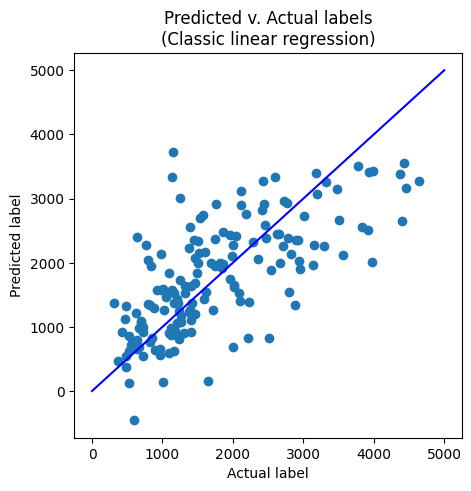

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=MLR_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Classic linear regression)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

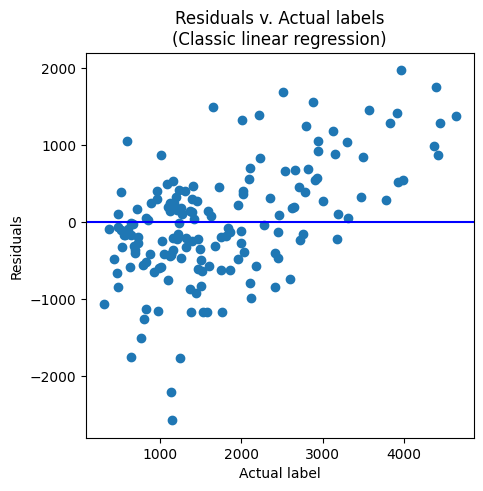

In [13]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-MLR_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Classic linear regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.2. Scaled Multiple Linear Regressor
Trained in all the features in scaled training data without cross validation

In [14]:
# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target_df, test_size=0.30, random_state=22)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 373 rows
Test Set: 161 rows


In [15]:
model_sc_MLR = LinearRegression().fit(X_train, y_train)
sc_MLR_pred = model_sc_MLR.predict(X_test)

sc_MLR_MSE = metrics.mean_squared_error(y_test, sc_MLR_pred)
sc_MLR_RMSE = np.sqrt(sc_MLR_MSE)
sc_MLR_MAE = metrics.mean_absolute_error(y_test, sc_MLR_pred)
sc_MLR_r2 = metrics.r2_score(y_test, sc_MLR_pred)

sc_MLR_report_df = pd.DataFrame(data=[['Scaled Multiple Linear Regression', sc_MLR_MSE, sc_MLR_RMSE, sc_MLR_MAE, sc_MLR_r2]], 
                                columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, sc_MLR_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.50416,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.50416,0.455478


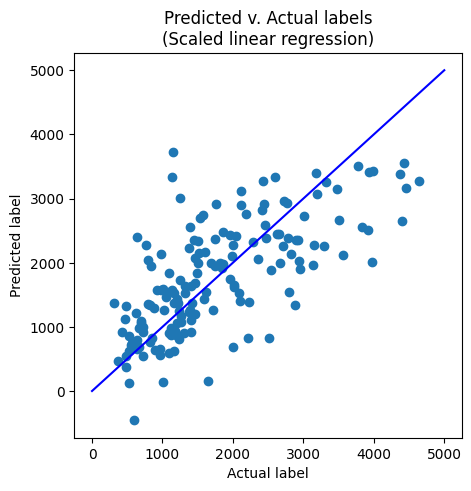

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=sc_MLR_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Scaled linear regression)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

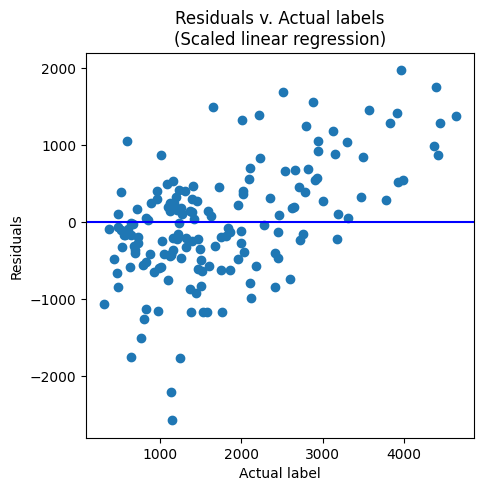

In [17]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-sc_MLR_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Scaled linear regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.3. Lasso Linear Regressor
Trained in all the features in scaled training data without cross validation

In [18]:
model_Lasso = Lasso(alpha=5).fit(X_train, y_train)
Lasso_pred = model_Lasso.predict(X_test)

Lasso_MSE = metrics.mean_squared_error(y_test, Lasso_pred)
Lasso_RMSE = np.sqrt(Lasso_MSE)
Lasso_MAE = metrics.mean_absolute_error(y_test, Lasso_pred)
Lasso_r2 = metrics.r2_score(y_test, Lasso_pred)

Lasso_report_df = pd.DataFrame(data=[['Lasso Regression', Lasso_MSE, Lasso_RMSE, Lasso_MAE, Lasso_r2]], 
                               columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, Lasso_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596


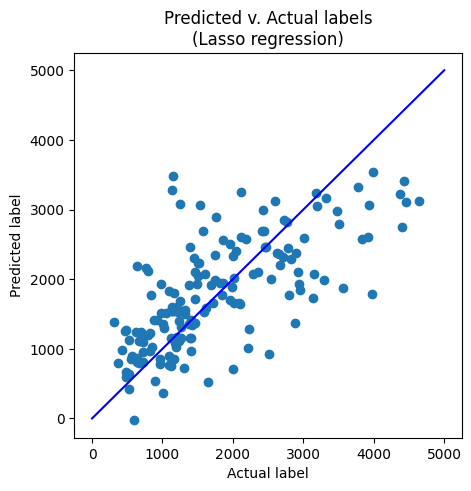

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=Lasso_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Lasso regression)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

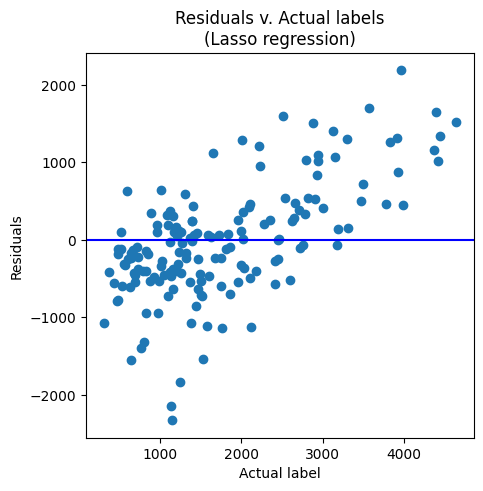

In [20]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-Lasso_pred.flatten()))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Lasso regression)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.4. Decision Tree Regressor
Trained in all the features in scaled training data without cross validation

In [21]:
model_tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_pred = model_tree.predict(X_test)

tree_MSE = metrics.mean_squared_error(y_test, tree_pred)
tree_RMSE = np.sqrt(tree_MSE)
tree_MAE = metrics.mean_absolute_error(y_test, tree_pred)
tree_r2 = metrics.r2_score(y_test, tree_pred)

tree_report_df = pd.DataFrame(data=[['Decision Tree Regressor', tree_MSE, tree_RMSE, tree_MAE, tree_r2]], 
                              columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, tree_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596
3,Decision Tree Regressor,863330.637358,929.155874,705.168187,0.175161


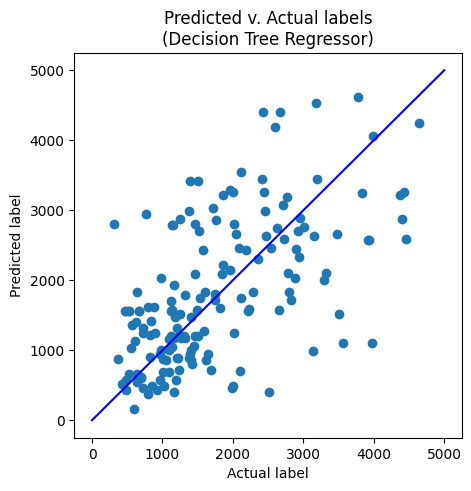

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=tree_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Decision Tree Regressor)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

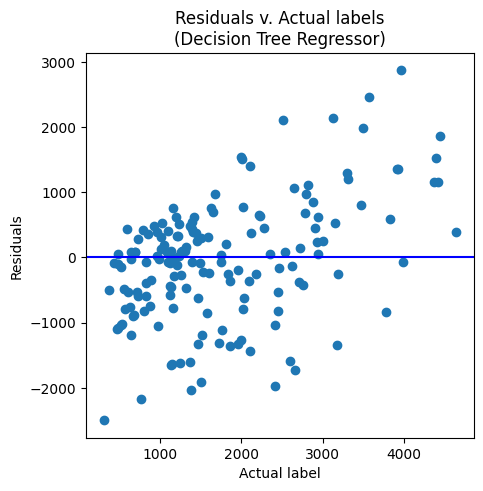

In [23]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-tree_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Decision Tree Regressor)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.5. Random Forest Regressor
Trained in all the features in scaled training data without cross validation

In [24]:
model_rf = RandomForestRegressor().fit(X_train, y_train)
rf_pred = model_rf.predict(X_test)

rf_MSE = metrics.mean_squared_error(y_test, rf_pred)
rf_RMSE = np.sqrt(rf_MSE)
rf_MAE = metrics.mean_absolute_error(y_test, rf_pred)
rf_r2 = metrics.r2_score(y_test, rf_pred)

rf_report_df = pd.DataFrame(data=[['Random Forest Regressor', rf_MSE, rf_RMSE, rf_MAE, rf_r2]], 
                            columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, rf_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596
3,Decision Tree Regressor,863330.637358,929.155874,705.168187,0.175161
4,Random Forest Regressor,451723.063217,672.103462,488.812576,0.568417


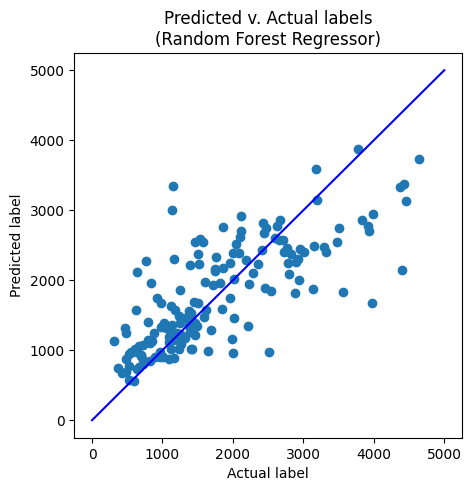

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=rf_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Random Forest Regressor)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

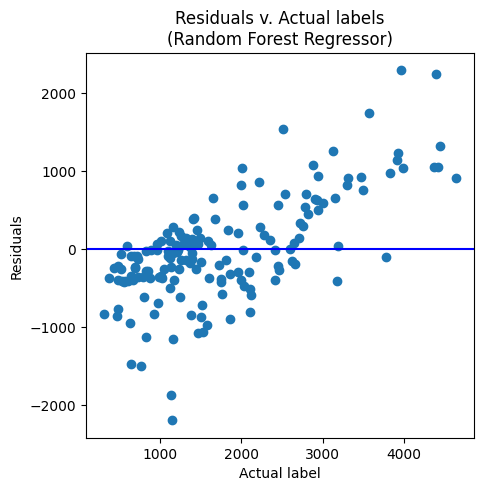

In [26]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-rf_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Random Forest Regressor)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.6. Gradient Boosting Regressor
Trained in all the features in scaled training data without cross validation

In [27]:
model_gb = GradientBoostingRegressor().fit(X_train, y_train)
gb_pred = model_gb.predict(X_test)

gb_MSE = metrics.mean_squared_error(y_test, gb_pred)
gb_RMSE = np.sqrt(gb_MSE)
gb_MAE = metrics.mean_absolute_error(y_test, gb_pred)
gb_r2 = metrics.r2_score(y_test, gb_pred)

gb_report_df = pd.DataFrame(data=[['Gradient Boosting Regressor', gb_MSE, gb_RMSE, gb_MAE, gb_r2]], 
                            columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, gb_report_df]).reset_index().drop(columns='index')
report_df


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596
3,Decision Tree Regressor,863330.637358,929.155874,705.168187,0.175161
4,Random Forest Regressor,451723.063217,672.103462,488.812576,0.568417
5,Gradient Boosting Regressor,461766.176091,679.533793,492.032145,0.558822


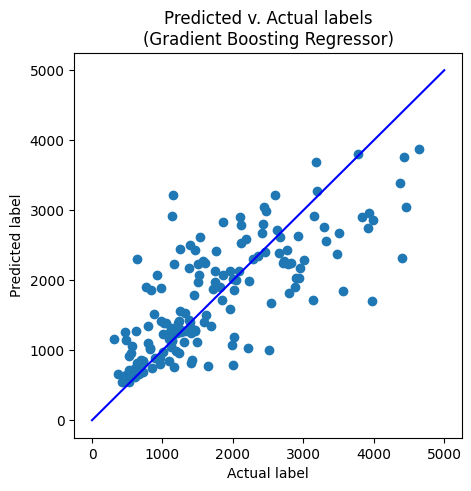

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=gb_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Gradient Boosting Regressor)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

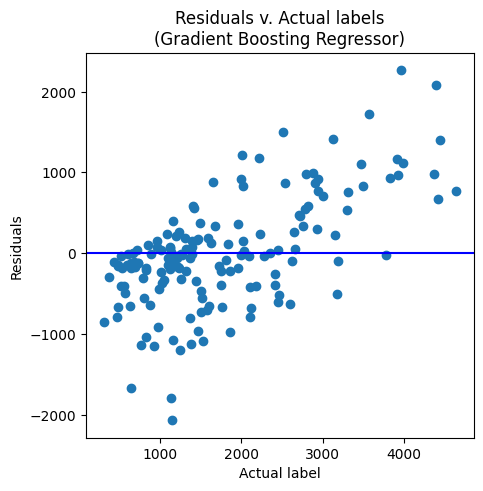

In [29]:
# Plot residuals
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-gb_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Gradient Boosting Regressor)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.7. Neural Network Regressor
Trained in all the features in scaled training data

In [30]:
# create model object
model_NNR = Sequential()
# Define hidden layers
model_NNR.add(Dense(len(X_train.columns)*4, input_dim=len(X_train.columns), activation='linear'))
model_NNR.add(Dense(len(X_train.columns)*3, activation='linear'))
model_NNR.add(Dense(len(X_train.columns)*2, activation='linear'))
model_NNR.add(Dense(len(X_train.columns), activation='linear'))
# define output layer
model_NNR.add(Dense(1, activation='linear'))

model_NNR.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse','r2_score'])
model_NNR.summary()

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 136)            │         4,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        13,974 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 68)             │         7,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 34)             │         2,346 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,119 (109.84 KB)

 Trainable params: 28,119 (109.84 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
NNR_history = model_NNR.fit(X_train, y_train, validation_split=0, epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1741.2145 - mse: 4082373.7500 - r2_score: -2.8940
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1706.4237 - mse: 3923698.7500 - r2_score: -2.8879 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1578.2552 - mse: 3462342.7500 - r2_score: -2.5739 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1185.2068 - mse: 2288169.0000 - r2_score: -1.3188 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 822.1844 - mse: 1075173.6250 - r2_score: -0.0101 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 777.6853 - mse: 974808.6250 - r2_score: 0.0224 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 756.8868 - mse: 979378.9375 - r2_score: 0.0281 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 757.7550 - mse: 887391.9375 - r2_score: 0.1099 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 741.9572 - mse: 923187.6250 - r2_score: 0.0754 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━

In [32]:
NNR_pred = model_NNR.predict(X_test)

NNR_MSE = metrics.mean_squared_error(y_test, NNR_pred)
NNR_RMSE = np.sqrt(NNR_MSE)
NNR_MAE = metrics.mean_absolute_error(y_test, NNR_pred)
NNR_r2 = metrics.r2_score(y_test, NNR_pred)

NNR_report_df = pd.DataFrame(data=[['Neural Network Regressor', NNR_MSE, NNR_RMSE, NNR_MAE, NNR_r2]], 
                            columns=['Model', 'MSE', 'RMSE', 'MAE', 'r2'])
report_df = pd.concat([report_df, NNR_report_df]).reset_index().drop(columns='index')
report_df

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596
3,Decision Tree Regressor,863330.637358,929.155874,705.168187,0.175161
4,Random Forest Regressor,451723.063217,672.103462,488.812576,0.568417
5,Gradient Boosting Regressor,461766.176091,679.533793,492.032145,0.558822
6,Neural Network Regressor,651854.915142,807.375325,594.152070,0.377208


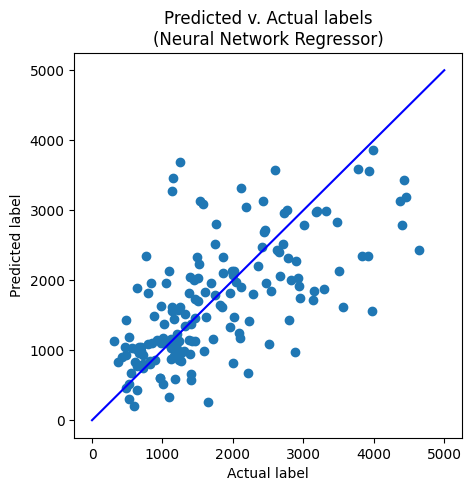

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=NNR_pred)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Predicted v. Actual labels\n(Neural Network Regressor)")
# overlay the perfect regression line
plt.plot((0,5000), (0,5000), color='blue')
plt.show()

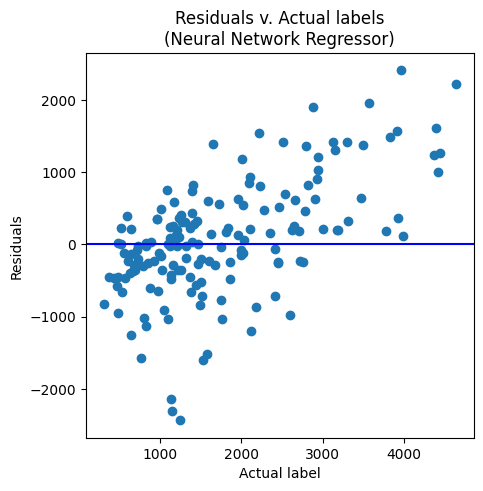

In [34]:
# Plot residuals
NNR_pred = NNR_pred.flatten()
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=(y_test-NNR_pred))
plt.xlabel("Actual label")
plt.ylabel("Residuals")
plt.title("Residuals v. Actual labels\n(Neural Network Regressor)")
# overlay the residuals=0 line
plt.axhline(y=0, color='b')
plt.show()

### 3.8.9. Select best model

In [35]:
# print test report metrics of all models
report_df

,Model,MSE,RMSE,MAE,r2
0,Classic Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
1,Scaled Multiple Linear Regression,569932.198114,754.938539,577.504160,0.455478
2,Lasso Regression,550968.782255,742.272714,560.754248,0.473596
3,Decision Tree Regressor,863330.637358,929.155874,705.168187,0.175161
4,Random Forest Regressor,451723.063217,672.103462,488.812576,0.568417
5,Gradient Boosting Regressor,461766.176091,679.533793,492.032145,0.558822
6,Neural Network Regressor,651854.915142,807.375325,594.152070,0.377208


Considering the scoring metrics captured, the best model would be the Random Forest Regressor.

### 3.8.10. Export best model for deployment and further optmization

In [36]:
import joblib

# Save the model as a pickle file
filename = './production_prediction_RF.pkl'
joblib.dump(model_rf, filename)

['./production_prediction_RF.pkl']

## 3.9. Conclusions and Recommendations

Further hyperparameter tuning and crossvalidation is needed to optimize the model output.

Also, there is a structure in the residual plot of all tested models. This is an indication of a polynomial relation between at least one feature and the target variable. Further exploration is needed to identify the feature that would provide the desired result.